## Task 1: Gauss-Jordan Method  

Write and test a function that solves an **n × n** system of linear equations using the **Gauss-Jordan method** with partial pivoting.  

For ten different matrix sizes larger than **500 × 500**, compare the execution time of your implemented function with the execution time of selected library functions.  


In [34]:
def gauss_jordan(A):
  n = len(A)
  for i in range(n):
    
    piv = i
    for j in range(i,n):
      if abs(A[j][i]) > abs(A[piv][i]):
        piv = j
    A[i],A[piv] = A[piv],A[i]

    for row in range(i+1,n):
      multi = A[row][i]/A[i][i]
      for col in range(i,n+1):
        A[row][col] -= A[i][col]*multi # upraszczanie
  
  for row in range(n):
    div = A[row][row]
    for col in range(n+1):
      A[row][col] /= div # normalizowanie

  #pseudorozwizywanie
    result = [A[i][n] for i in range(n)]

  return result

In [32]:
from random import random

def randomMatrix(N):
  A = [[random() for _ in range(N+1)] for _ in range(N)]
  A2 = [[A[i][j] for j in range(len(A))] for i in range(len(A))]
  A3 = [A[i][len(A)] for i in range(len(A))]
  return A, A2, A3

In [51]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

x_axis = []
time1 = []
time2 = []
for N in range(500,1001,50):
  A, A_solve, B_solve = randomMatrix(N)
  x_axis.append(N)
  start = time()
  gauss_jordan(A)
  time1.append(time()-start)
  start = time()
  np.linalg.solve(A_solve,B_solve)
  time2.append(time()-start)

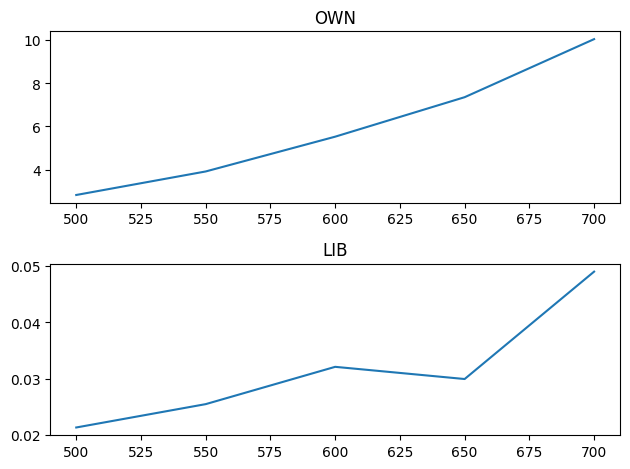

In [37]:
fig, axs = plt.subplots(2)

axs[0].plot(x_axis, time1)
axs[0].set_title('OWN')

axs[1].plot(x_axis, time2)
axs[1].set_title('LIB')

plt.tight_layout()

# Task 2: LU Factorization

Write and test a function that performs the LU factorization of a matrix A, such that A = LU, without pivoting. Verify the correctness of the result by computing |A - LU| . Ensure that the implementation is in-place.

The elements of the matrix L are the multiplication factors that enable the elimination of the appropriate coefficients of matrix  A during the elimination process.


In [48]:
def LU(A):
  n = len(A)
  #faktoryzacja
  for j in range(n):
      for i in range(j+1, n):
        mult = A[i][j]/A[j][j]
        for k in range(j,n):
          A[i][k] -= A[j][k]*mult
        A[i][j] = mult

In [39]:
def randomMatrixV2(N):
  A = [[random() + 12345e-10 for _ in range(N)] for _ in range(N)]
  return A

In [ ]:
A = randomMatrixV2(5)
for v in A:
    print(v,"\n")
LU(A)
print("\n")
for v in A:
    print(v,"\n")

U = [[A[i][j] if i <= j else 0 for j in range(len(A))] for i in range(len(A))]

print("\nU:")
for v in U:
    print(v,"\n")


L = [[A[i][j] if i > j else 1 if i == j else 0 for j in range(len(A))] for i in range(len(A))]

print("\nL:")
for v in L:
    print(v,"\n")

A_2 = np.dot(L,U)
print("\n  A_2:")
for v in A_2:
    print(v,"\n")

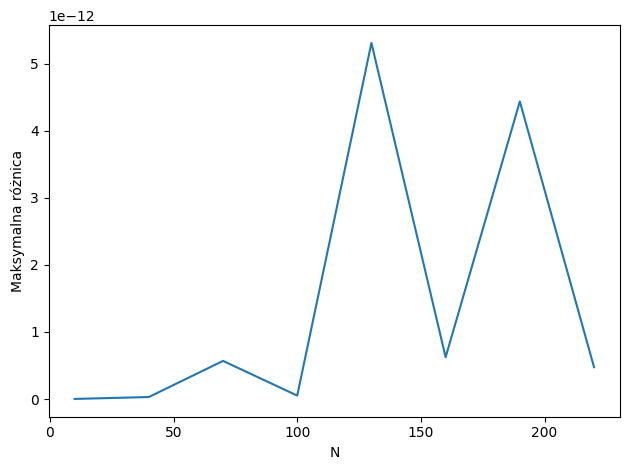

In [49]:
from copy import deepcopy

def LU_Check(N):
    A = randomMatrixV2(N)
    TMP = deepcopy(A)
    
    try:
        LU(TMP)
        U = [[TMP[i][j] if i <= j else 0 for j in range(N)] for i in range(N)]
        L = [[TMP[i][j] if i > j else 1 if i == j else 0 for j in range(N)] for i in range(N)]
        A_2 = np.dot(L, U)

        max_diff = 0
        for i in range(N):
            for j in range(N):
                max_diff = max(max_diff, abs(A[i][j] - A_2[i][j]))
        
        return max_diff
    except ZeroDivisionError:
        return None # jak jest det = 0

x_axis = []
results = []
for N in range(10,250,30):
    x_axis.append(N)
    results.append(LU_Check(N))

plt.plot(x_axis,results)
plt.xlabel("N")
plt.ylabel("Maksymalna różnica")
plt.tight_layout()
plt.show()

In [ ]:
x_axis = []
results = []
for N in range(50, 151, 50):
    x_axis.append(N)
    result = LU_Check(N)
    if result is not None:
        results.append(result)
    else:
        # wywalanie nonów
        x_axis.pop()  

plt.plot(x_axis, results)
plt.ylabel("Maksymalna różnica")
plt.tight_layout()
plt.show()

In [50]:
print(results)

[1.3322676295501878e-15, 2.964295475749168e-14, 5.683231663056176e-13, 5.10702591327572e-14, 5.310862860596899e-12, 6.24167384444263e-13, 4.438116540939063e-12, 4.74953409934642e-13]
